## <center><font color='blue'>IICR functions for the n-island model</font></center>

This is a test notebook for the Python package <em>nisland</em>.

For an n-island model with $n$ islands, $T_{k,\sigma}^{(K),n,M}$ denotes the $k$-th coalescence time where $K$ is the initial number of genes, $M$ the constant migration rate and $\sigma$ the initial state, i.e. an initial repartition of the $K$ genes in the $n$ islands.

Denoting by $F(t)$ the cumulative distribution function $F(t) = \mbox{P}_\sigma ( T_{k,\sigma}^{(K),n,M} \leq t )$, the IICR is defined by
$$
\lambda_{k,\sigma}^{(K),n,M}(t) = \frac{k(k-1)}{2} \; \frac{1 - F(t)}{F'(t)}.
$$

#####  <font color='blue'> Importing some packages</font>

In [1]:
import numpy as np
from nisland import *
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(9.0,6.0)

### <font color='blue'>1. Graph of $\lambda_{2,1}^{(4),10,1.0}(t)$ for $0 \leq t \leq 4$</font> 
In the initial state, all 4 genes are located in the same island (st=0) 

In [2]:
n=10
M=1.0
K=4
k=2
st=0 

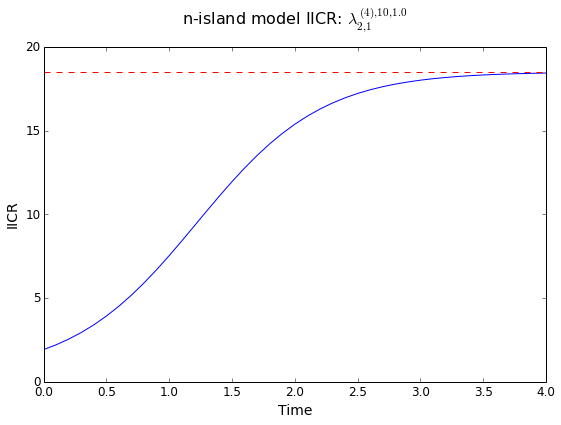

In [3]:
lt = np.arange(0.001,4.0011,0.1)
lv = [mk_F_iicr(n,M,K,k,st,t)[1]  for t in lt]

lim=-k*(k-1)/2/main_eigenvalue(n,M,k)

tit = 'n-island model IICR: $\lambda_{'+str(k)+','+str(st+1)+'}^{('+str(K)+'),'+str(n)+','+str(M)+'}$'

plt.plot(lt,lv,color='blue')
plt.plot([0,4],[lim,lim],color='red',linestyle='dashed')
plt.title(tit,fontsize=16,y=1.05)
plt.axis([0,4,0,20])
plt.xlabel('Time',fontsize=14)
plt.ylabel('IICR',fontsize=14)
plt.tick_params(axis='both',which='major',labelsize=12)
plt.show()

The limit when $t \to + \infty$ is:

In [4]:
print 'lim =',lim

lim = 18.5138781887


### <font color='blue'>2. Graph of $\lambda_{k,1}^{(5),10,1.0}(t)$ for $2 \leq k \leq 5$ and $0 \leq t \leq 4$</font> 
In the initial state, all 5 genes are located in the same island (st=0) 

In [5]:
n=10
M=1.0
K=5
kmax=5
st=0 
tmin=0.001
tmax=4.001
dt=0.1

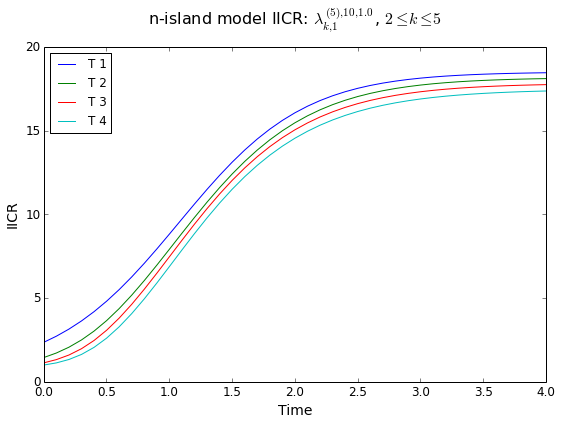

In [6]:
llpt = mk_fixed_K_iicrs(n,M,K,kmax, st, tmin,tmax,dt)

tit = 'n-island model IICR: $\lambda_{k,'+str(st+1)+'}^{('+str(K)+'),'
tit += str(n)+','+str(M)+'}$, $2 \leq k \leq'+str(kmax)+'$'

for i in range(1,len(llpt)):
  plt.plot(llpt[0],llpt[i],label = "T {}".format(i))
plt.axis([0,4,0,20])
plt.xlabel('Time',fontsize=14)
plt.ylabel('IICR',fontsize=14)
plt.tick_params(axis='both',which='major',labelsize=12)
plt.title(tit,fontsize=16,y=1.05)
plt.legend(loc="best")
plt.show()

### <font color='blue'>3. Graph of $\lambda_{2,1}^{(K),4,1.0}(t)$ for $2 \leq K \leq 20$ and $0 \leq t \leq 4$</font> 
In initial states (one for each value of K), all genes are located in the same island (st=0)

In [7]:
n=4
M=1.0
Kmax=20
k=2
st=0 
t0=0.001
tmax=4.001
dt=0.1

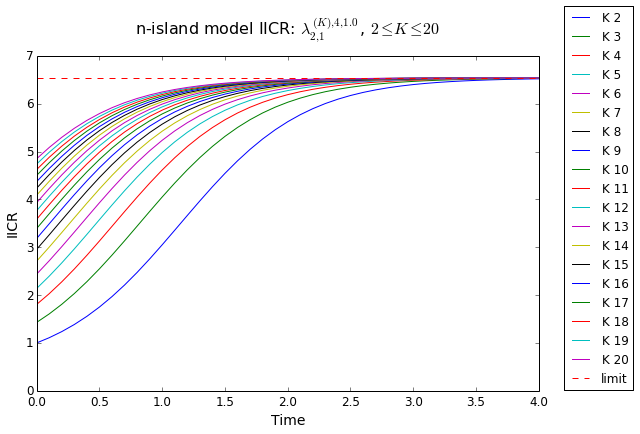

In [8]:
res= mk_fixed_k_iicrs(n,M,Kmax,k,st,t0,tmax,dt)

lim=-k*(k-1)/2/main_eigenvalue(n,M,k)

tit = 'n-island model IICR: $\lambda_{2,'+str(st+1)+'}^{(K),'
tit += str(n)+','+str(M)+'}$, $2 \leq K \leq'+str(Kmax)+'$'

for i in range(1,Kmax-k+2):
  plt.plot(res[:,0],res[:,i],label = "K {}".format(k+i-1))
plt.plot([0,4],[lim,lim],color='red',linestyle='dashed',label='limit')
plt.axis([0,4,0,7])
plt.xlabel('Time',fontsize=14)
plt.ylabel('IICR',fontsize=14)
plt.tick_params(axis='both',which='major',labelsize=12) 
plt.title(tit,fontsize=16,y=1.05)
plt.legend(bbox_to_anchor=(1.2,-0.015),loc=4)
plt.show()

The limit when $t \to + \infty$ is:

In [9]:
lim

6.541381265149109

The same graphic, below obtained under Maple and animated, shows the behavior fo the IICC when $K \to +\infty$.
<img src="iicr_n4_M1_k2_st1.gif">
It could be interesting to obtain a similar animated graphic using the Python package 'animate'.